<a href="https://colab.research.google.com/github/hashanranasinghe/ML/blob/main/weather.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import folium
import seaborn as sns

In [55]:
df = pd.read_csv('/content/SriLanka_Weather_Dataset.csv')

In [56]:
df.head(5)

,time,weathercode,temperature_2m_max,temperature_2m_min,temperature_2m_mean,apparent_temperature_max,apparent_temperature_min,apparent_temperature_mean,sunrise,sunset,...,precipitation_hours,windspeed_10m_max,windgusts_10m_max,winddirection_10m_dominant,et0_fao_evapotranspiration,latitude,longitude,elevation,country,city
0,2010-01-01,2,30.0,22.7,26.1,34.4,25.2,29.2,2010-01-01T00:52,2010-01-01T12:35,...,0.0,11.7,27.4,20,4.58,7.0,79.899994,16.0,Sri Lanka,Colombo
1,2010-01-02,51,29.9,23.5,26.2,33.8,26.2,29.8,2010-01-02T00:52,2010-01-02T12:36,...,1.0,13.0,27.0,24,3.84,7.0,79.899994,16.0,Sri Lanka,Colombo
2,2010-01-03,51,29.5,23.2,26.0,34.3,26.3,29.9,2010-01-03T00:53,2010-01-03T12:36,...,3.0,12.3,27.4,16,3.65,7.0,79.899994,16.0,Sri Lanka,Colombo
3,2010-01-04,2,28.9,21.9,25.3,31.6,23.4,27.8,2010-01-04T00:53,2010-01-04T12:37,...,0.0,17.0,34.6,356,3.79,7.0,79.899994,16.0,Sri Lanka,Colombo
4,2010-01-05,1,28.1,21.3,24.5,30.1,23.1,26.1,2010-01-05T00:53,2010-01-05T12:37,...,0.0,18.7,37.1,355,4.97,7.0,79.899994,16.0,Sri Lanka,Colombo


The dataset includes information such as:


* Time: The timestamp of each weather observation.

* Weather Code: A numerical code representing the weather conditions at the given time.

* Temperature: Maximum, minimum, and mean values of 2-meter temperature.

* Apparent Temperature: Maximum, minimum, and mean values of apparent * temperature, which takes into account factors like wind chill or heat index.

* Sunrise and Sunset: The times of sunrise and sunset for each day.

* Shortwave Radiation: Sum of shortwave radiation received during the observation period.

* Precipitation: Total sum of precipitation, including rainfall and snowfall.

* Precipitation Hours: The duration of time with measurable precipitation.

* Wind Speed and Gusts: Maximum values of wind speed and wind gusts at 10 meters above ground level.

* Wind Direction: Dominant wind direction at 10 meters above ground level.

* Evapotranspiration: Reference evapotranspiration (ET0) based on the FAO Penman-Monteith equation.

* Latitude, Longitude, and Elevation: Geographic coordinates and elevation of each city.

* Country and City: Names of the country and city corresponding to each weather observation.




In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147480 entries, 0 to 147479
Data columns (total 24 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   time                        147480 non-null  object 
 1   weathercode                 147480 non-null  int64  
 2   temperature_2m_max          147480 non-null  float64
 3   temperature_2m_min          147480 non-null  float64
 4   temperature_2m_mean         147480 non-null  float64
 5   apparent_temperature_max    147480 non-null  float64
 6   apparent_temperature_min    147480 non-null  float64
 7   apparent_temperature_mean   147480 non-null  float64
 8   sunrise                     147480 non-null  object 
 9   sunset                      147480 non-null  object 
 10  shortwave_radiation_sum     147480 non-null  float64
 11  precipitation_sum           147480 non-null  float64
 12  rain_sum                    147480 non-null  float64
 13  snowfall_sum  

In [58]:
print(df.duplicated().sum())

0


In [59]:
df.describe()

,weathercode,temperature_2m_max,temperature_2m_min,temperature_2m_mean,apparent_temperature_max,apparent_temperature_min,apparent_temperature_mean,shortwave_radiation_sum,precipitation_sum,rain_sum,snowfall_sum,precipitation_hours,windspeed_10m_max,windgusts_10m_max,winddirection_10m_dominant,et0_fao_evapotranspiration,latitude,longitude,elevation
count,147480.000000,147480.000000,147480.000000,147480.000000,147480.000000,147480.000000,147480.000000,147480.000000,147480.000000,147480.000000,147480.0,147480.000000,147480.000000,147480.000000,147480.000000,147480.000000,147480.000000,147480.000000,147480.000000
mean,46.647776,29.242367,23.899913,26.225590,34.112355,27.711096,30.317066,18.483513,5.975637,5.975637,0.0,8.762524,15.561288,34.796932,182.881625,3.896143,7.123334,80.263335,111.733333
std,21.623876,2.120345,2.059291,1.842147,2.966144,2.835051,2.540275,4.214270,10.215294,10.215294,0.0,7.191010,6.213737,10.214372,93.670247,1.023126,0.798620,0.488871,266.380824
min,0.000000,17.500000,12.100000,16.300000,18.500000,10.500000,16.300000,1.230000,0.000000,0.000000,0.0,0.000000,2.200000,11.500000,0.000000,0.420000,6.000000,79.800020,0.000000
25%,51.000000,28.200000,23.100000,25.600000,32.400000,26.400000,29.200000,16.220000,0.400000,0.400000,0.0,2.000000,11.000000,26.600000,88.000000,3.260000,6.800003,79.899994,7.000000
50%,53.000000,29.200000,24.300000,26.400000,34.200000,28.400000,30.800000,19.130000,2.600000,2.600000,0.0,8.000000,15.000000,33.100000,215.000000,3.890000,6.900002,80.000000,14.000000
75%,61.000000,30.400000,25.200000,27.200000,36.100000,29.600000,31.900000,21.510000,7.500000,7.500000,0.0,14.000000,18.900000,41.800000,249.000000,4.550000,7.400002,80.399994,27.000000
max,65.000000,37.500000,30.000000,31.800000,43.400000,34.700000,37.400000,28.980000,338.800000,338.800000,0.0,24.000000,50.200000,91.800000,360.000000,8.140000,9.700005,81.800020,1281.000000


In [60]:
types_of_countries =  df['country'].unique()
print(types_of_countries)

['Sri Lanka']


In [61]:
types_of_cities =  df['city'].unique()
print(types_of_cities)
print(len(types_of_cities))

['Colombo' 'Mount Lavinia' 'Kesbewa' 'Moratuwa' 'Maharagama' 'Ratnapura'
 'Kandy' 'Negombo' 'Sri Jayewardenepura Kotte' 'Kalmunai' 'Trincomalee'
 'Galle' 'Jaffna' 'Athurugiriya' 'Weligama' 'Matara' 'Kolonnawa' 'Gampaha'
 'Puttalam' 'Badulla' 'Kalutara' 'Bentota' 'Matale' 'Mannar' 'Pothuhera'
 'Kurunegala' 'Mabole' 'Hatton' 'Hambantota' 'Oruwala']
30


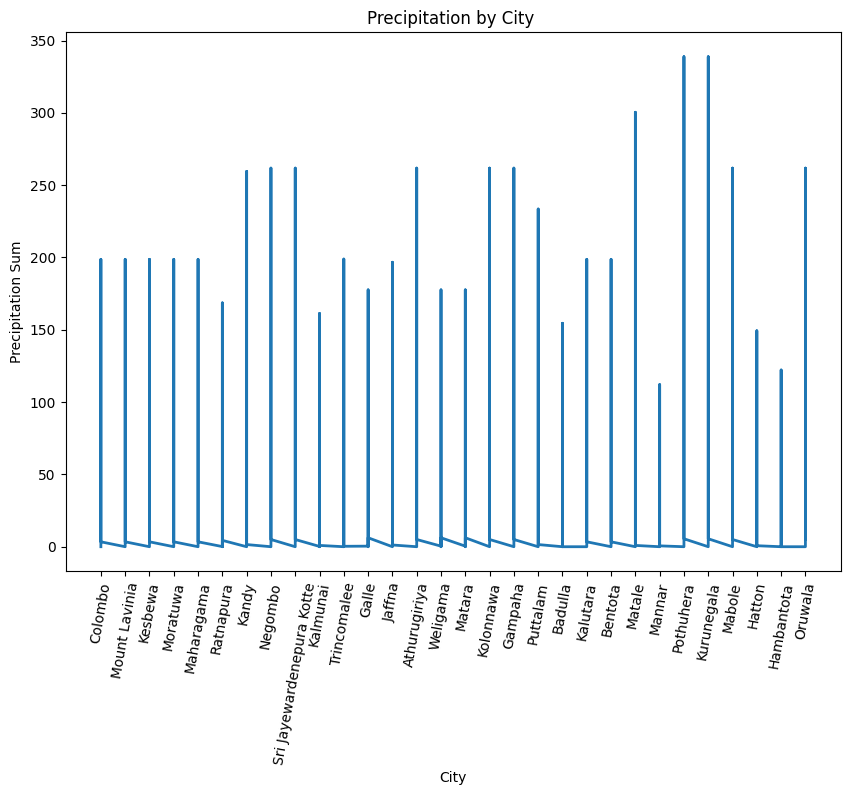

In [62]:
fig, ax = plt.subplots(figsize=(10, 7))

ax.plot(df['city'], df['precipitation_sum'], linewidth=2.0)

ax.set_xlabel('City')
plt.xticks(rotation=80)
ax.set_ylabel('Precipitation Sum')
ax.set_title('Precipitation by City ')

plt.show()

In [63]:
cities = pd.DataFrame({'Cities' : df['city'].unique()})
latitudes = []
longitudes = []

for i in range(cities['Cities'].size):
    lat = df.loc[df['city'] == cities['Cities'].iloc[i]]['latitude'].iloc[0]
    long = df.loc[df['city'] == cities['Cities'].iloc[i]]['longitude'].iloc[0]
    latitudes.append(lat)
    longitudes.append(long)
cities['latitude'] = latitudes; cities['longitude'] = longitudes

In [64]:
city_locations = folium.Map(width = 600, height = 400, location=[7.877083,80.697917], tiles='cartodbpositronnolabels', zoom_start=7, zoom_control=False,
               scrollWheelZoom=False,
               dragging=False)


for idx, row in cities.iterrows():
    folium.Circle(location = [row['latitude'], row['longitude']],
                  radius = 2000,
                 ).add_child(folium.Popup(row['Cities'])).add_to(city_locations)

city_locations

In [65]:
df['time'] = pd.to_datetime(df['time'])
df['year_month'] = df['time'].dt.to_period('M')
monthly_avg_temp = df.groupby('year_month')['temperature_2m_mean'].mean().reset_index()

In [66]:
monthly_avg_temp

,year_month,temperature_2m_mean
0,2010-01,25.478817
1,2010-02,26.475714
2,2010-03,27.654409
3,2010-04,27.260444
4,2010-05,27.036022
...,...,...
157,2023-02,25.565833
158,2023-03,26.502043
159,2023-04,27.228556
160,2023-05,27.118925


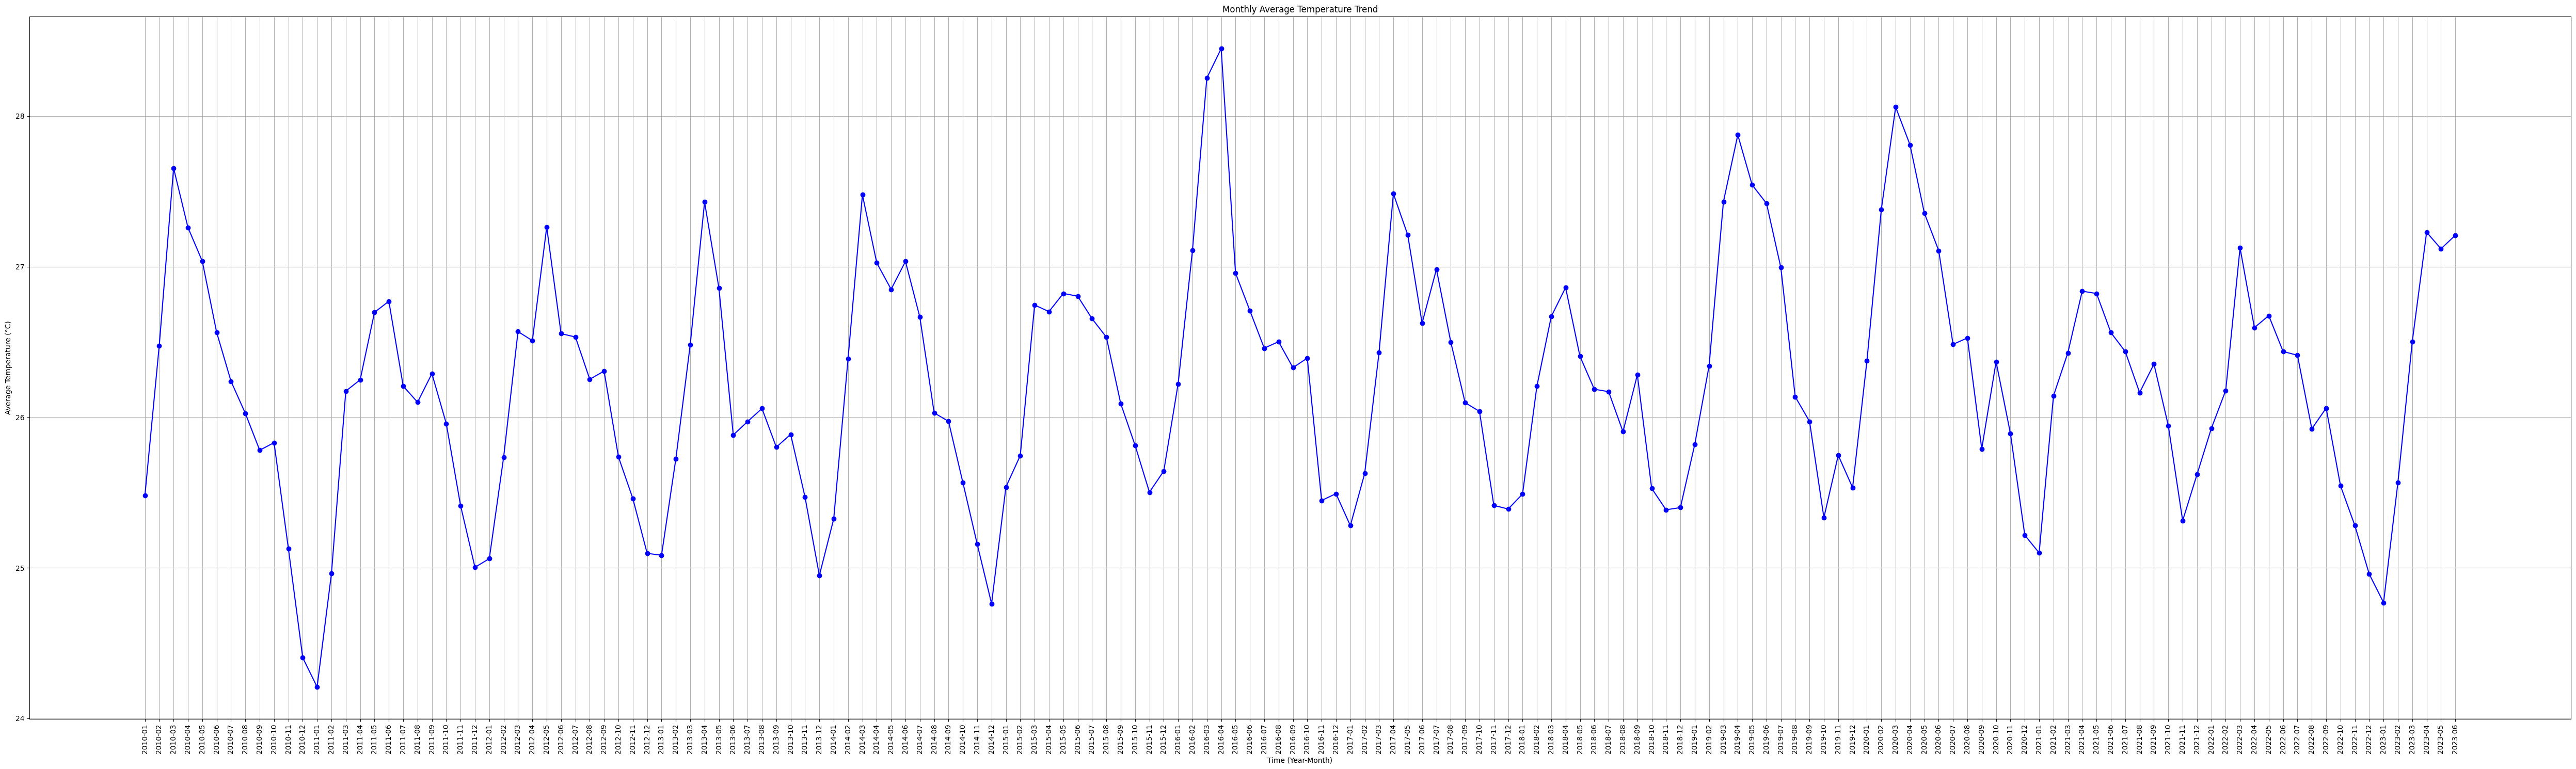

In [67]:
plt.figure(figsize=(50, 15))
plt.plot(monthly_avg_temp.year_month.astype(str), monthly_avg_temp.temperature_2m_mean, marker='o', linestyle='-', color='b')
plt.title('Monthly Average Temperature Trend')
plt.xlabel('Time (Year-Month)')
plt.ylabel('Average Temperature (°C)')
plt.xticks(rotation=90)
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()

In [68]:
cities = pd.DataFrame({'Cities' : df['city'].unique()})
elevation = []

for i in range(cities['Cities'].size):
    ele = df.loc[df['city'] == cities['Cities'].iloc[i]]['elevation'].iloc[0]
    elevation.append(ele)
cities['elevation'] = elevation;

In [69]:
cities

,Cities,elevation
0,Colombo,16.0
1,Mount Lavinia,10.0
2,Kesbewa,18.0
3,Moratuwa,9.0
4,Maharagama,26.0
5,Ratnapura,27.0
6,Kandy,510.0
7,Negombo,5.0
8,Sri Jayewardenepura Kotte,7.0
9,Kalmunai,8.0


Text(0.5, 1.0, 'Elevation of Cities')

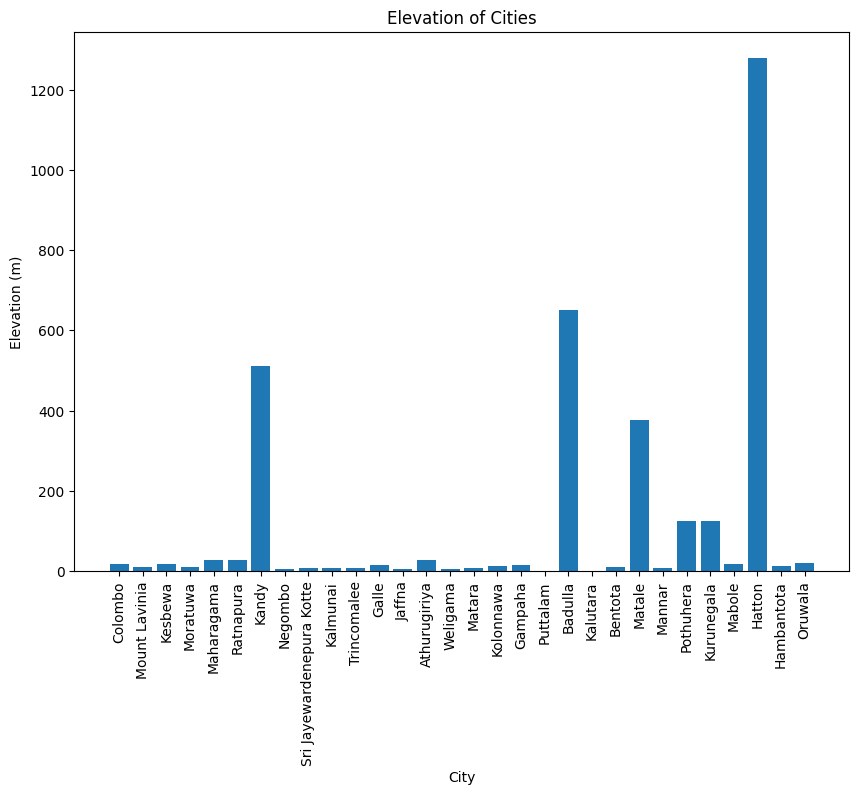

In [70]:
plt.figure(figsize=(10, 7))
plt.bar(cities['Cities'], cities['elevation'])
plt.xlabel('City')
plt.xticks(rotation=90)
plt.ylabel('Elevation (m)')
plt.title('Elevation of Cities')

In [71]:
df['winddirection_10m_dominant'].min(), df['winddirection_10m_dominant'].max()

(0, 360)

In [72]:
df['precipitation_hours'].min(), df['precipitation_hours'].max()

(0.0, 24.0)

In [73]:
df.head(2)

,time,weathercode,temperature_2m_max,temperature_2m_min,temperature_2m_mean,apparent_temperature_max,apparent_temperature_min,apparent_temperature_mean,sunrise,sunset,...,windspeed_10m_max,windgusts_10m_max,winddirection_10m_dominant,et0_fao_evapotranspiration,latitude,longitude,elevation,country,city,year_month
0,2010-01-01,2,30.0,22.7,26.1,34.4,25.2,29.2,2010-01-01T00:52,2010-01-01T12:35,...,11.7,27.4,20,4.58,7.0,79.899994,16.0,Sri Lanka,Colombo,2010-01
1,2010-01-02,51,29.9,23.5,26.2,33.8,26.2,29.8,2010-01-02T00:52,2010-01-02T12:36,...,13.0,27.0,24,3.84,7.0,79.899994,16.0,Sri Lanka,Colombo,2010-01


In [74]:
wind_direction_with_elevation = df.groupby('elevation')['winddirection_10m_dominant'].mean().reset_index()
wind_direction_with_elevation

,elevation,winddirection_10m_dominant
0,0.0,181.112897
1,5.0,180.139409
2,6.0,152.548820
3,7.0,184.613168
4,8.0,137.890155
5,9.0,199.180228
6,10.0,199.180228
7,12.0,183.335639
8,13.0,181.927380
9,15.0,195.772172


In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147480 entries, 0 to 147479
Data columns (total 25 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   time                        147480 non-null  datetime64[ns]
 1   weathercode                 147480 non-null  int64         
 2   temperature_2m_max          147480 non-null  float64       
 3   temperature_2m_min          147480 non-null  float64       
 4   temperature_2m_mean         147480 non-null  float64       
 5   apparent_temperature_max    147480 non-null  float64       
 6   apparent_temperature_min    147480 non-null  float64       
 7   apparent_temperature_mean   147480 non-null  float64       
 8   sunrise                     147480 non-null  object        
 9   sunset                      147480 non-null  object        
 10  shortwave_radiation_sum     147480 non-null  float64       
 11  precipitation_sum           147480 non-

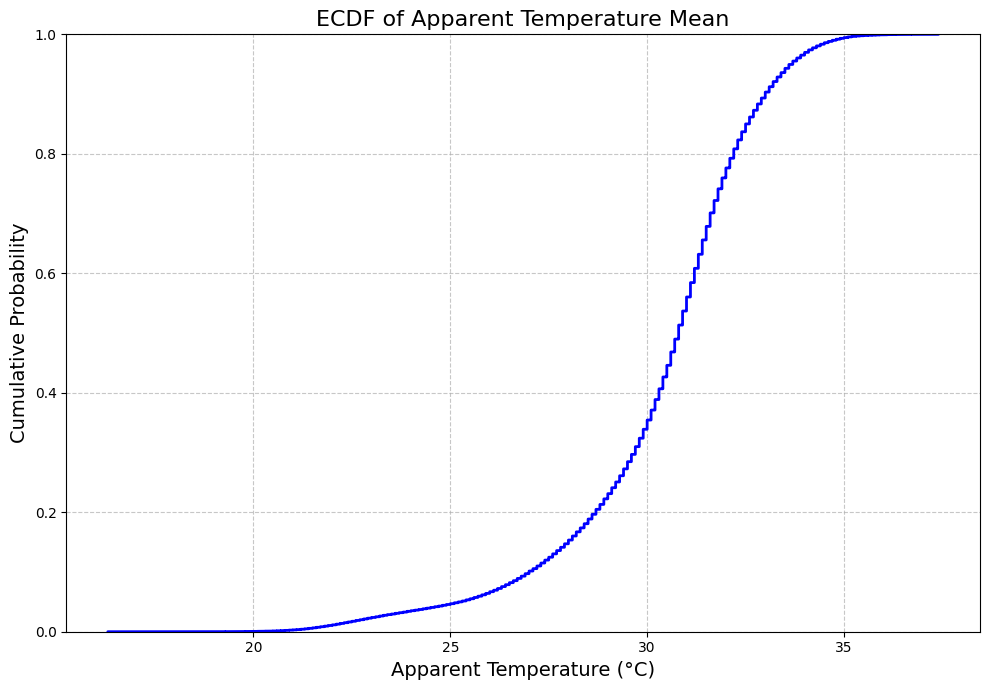

In [76]:
fig, ax = plt.subplots(figsize=(10, 7))

# Plot the ECDF using seaborn for better styling
sns.ecdfplot(df['apparent_temperature_mean'], ax=ax, color='blue', linewidth=2)

# Add titles and labels
ax.set_title('ECDF of Apparent Temperature Mean', fontsize=16)
ax.set_xlabel('Apparent Temperature (°C)', fontsize=14)
ax.set_ylabel('Cumulative Probability', fontsize=14)

# Customize grid for better visibility
ax.grid(True, linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

In [77]:
df =df.drop(['year_month'], axis=1)

In [78]:
year_with_wind_max = pd.DataFrame({'time' : df['time'],'windspeed_10m_max':df['windspeed_10m_max'], 'apparent_temperature_max':df['apparent_temperature_max'] })
year_with_wind_max

,time,windspeed_10m_max,apparent_temperature_max
0,2010-01-01,11.7,34.4
1,2010-01-02,13.0,33.8
2,2010-01-03,12.3,34.3
3,2010-01-04,17.0,31.6
4,2010-01-05,18.7,30.1
...,...,...,...
147475,2023-06-13,15.6,35.4
147476,2023-06-14,16.4,34.3
147477,2023-06-15,12.6,36.6
147478,2023-06-16,20.5,36.2


In [79]:
year_with_wind_max['year'] = year_with_wind_max['time'].dt.to_period('Y')
year_with_wind_max


,time,windspeed_10m_max,apparent_temperature_max,year
0,2010-01-01,11.7,34.4,2010
1,2010-01-02,13.0,33.8,2010
2,2010-01-03,12.3,34.3,2010
3,2010-01-04,17.0,31.6,2010
4,2010-01-05,18.7,30.1,2010
...,...,...,...,...
147475,2023-06-13,15.6,35.4,2023
147476,2023-06-14,16.4,34.3,2023
147477,2023-06-15,12.6,36.6,2023
147478,2023-06-16,20.5,36.2,2023


In [80]:
max_windspeed_year = (
    year_with_wind_max.groupby('year')
    .agg({'windspeed_10m_max': 'max', 'apparent_temperature_max': 'max'})
    .reset_index()
)

max_windspeed_year

,year,windspeed_10m_max,apparent_temperature_max
0,2010,48.0,42.8
1,2011,44.2,41.4
2,2012,46.5,43.4
3,2013,45.7,42.2
4,2014,41.8,41.7
5,2015,46.7,41.6
6,2016,46.9,42.4
7,2017,47.0,42.6
8,2018,48.7,42.4
9,2019,47.0,42.5


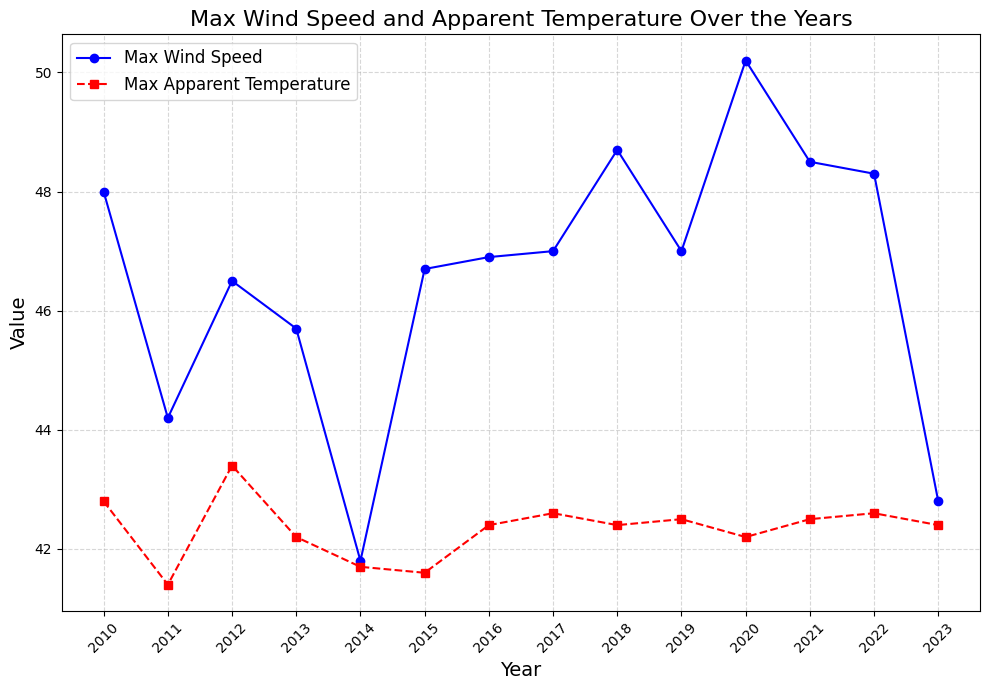

In [81]:
plt.figure(figsize=(10, 7))

plt.plot(max_windspeed_year['year'].astype(str),
         max_windspeed_year['windspeed_10m_max'],
         marker='o', linestyle='-', color='blue', label='Max Wind Speed')

plt.plot(max_windspeed_year['year'].astype(str),
         max_windspeed_year['apparent_temperature_max'],
         marker='s', linestyle='--', color='red', label='Max Apparent Temperature')

plt.title('Max Wind Speed and Apparent Temperature Over the Years', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Value', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)

plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


# build a model

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147480 entries, 0 to 147479
Data columns (total 24 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   time                        147480 non-null  datetime64[ns]
 1   weathercode                 147480 non-null  int64         
 2   temperature_2m_max          147480 non-null  float64       
 3   temperature_2m_min          147480 non-null  float64       
 4   temperature_2m_mean         147480 non-null  float64       
 5   apparent_temperature_max    147480 non-null  float64       
 6   apparent_temperature_min    147480 non-null  float64       
 7   apparent_temperature_mean   147480 non-null  float64       
 8   sunrise                     147480 non-null  object        
 9   sunset                      147480 non-null  object        
 10  shortwave_radiation_sum     147480 non-null  float64       
 11  precipitation_sum           147480 non-

In [83]:
df= df.drop(['country'], axis=1)

In [84]:
df.head(5)

,time,weathercode,temperature_2m_max,temperature_2m_min,temperature_2m_mean,apparent_temperature_max,apparent_temperature_min,apparent_temperature_mean,sunrise,sunset,...,snowfall_sum,precipitation_hours,windspeed_10m_max,windgusts_10m_max,winddirection_10m_dominant,et0_fao_evapotranspiration,latitude,longitude,elevation,city
0,2010-01-01,2,30.0,22.7,26.1,34.4,25.2,29.2,2010-01-01T00:52,2010-01-01T12:35,...,0.0,0.0,11.7,27.4,20,4.58,7.0,79.899994,16.0,Colombo
1,2010-01-02,51,29.9,23.5,26.2,33.8,26.2,29.8,2010-01-02T00:52,2010-01-02T12:36,...,0.0,1.0,13.0,27.0,24,3.84,7.0,79.899994,16.0,Colombo
2,2010-01-03,51,29.5,23.2,26.0,34.3,26.3,29.9,2010-01-03T00:53,2010-01-03T12:36,...,0.0,3.0,12.3,27.4,16,3.65,7.0,79.899994,16.0,Colombo
3,2010-01-04,2,28.9,21.9,25.3,31.6,23.4,27.8,2010-01-04T00:53,2010-01-04T12:37,...,0.0,0.0,17.0,34.6,356,3.79,7.0,79.899994,16.0,Colombo
4,2010-01-05,1,28.1,21.3,24.5,30.1,23.1,26.1,2010-01-05T00:53,2010-01-05T12:37,...,0.0,0.0,18.7,37.1,355,4.97,7.0,79.899994,16.0,Colombo


In [85]:
df = df.drop(['longitude','latitude','weathercode'],axis=1)

In [86]:
df = df.drop(['elevation'],axis=1)

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147480 entries, 0 to 147479
Data columns (total 19 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   time                        147480 non-null  datetime64[ns]
 1   temperature_2m_max          147480 non-null  float64       
 2   temperature_2m_min          147480 non-null  float64       
 3   temperature_2m_mean         147480 non-null  float64       
 4   apparent_temperature_max    147480 non-null  float64       
 5   apparent_temperature_min    147480 non-null  float64       
 6   apparent_temperature_mean   147480 non-null  float64       
 7   sunrise                     147480 non-null  object        
 8   sunset                      147480 non-null  object        
 9   shortwave_radiation_sum     147480 non-null  float64       
 10  precipitation_sum           147480 non-null  float64       
 11  rain_sum                    147480 non-

In [88]:
df['time_year'] = df['time'].dt.year
df['time_month'] = df['time'].dt.month
df['time_day'] = df['time'].dt.day

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147480 entries, 0 to 147479
Data columns (total 22 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   time                        147480 non-null  datetime64[ns]
 1   temperature_2m_max          147480 non-null  float64       
 2   temperature_2m_min          147480 non-null  float64       
 3   temperature_2m_mean         147480 non-null  float64       
 4   apparent_temperature_max    147480 non-null  float64       
 5   apparent_temperature_min    147480 non-null  float64       
 6   apparent_temperature_mean   147480 non-null  float64       
 7   sunrise                     147480 non-null  object        
 8   sunset                      147480 non-null  object        
 9   shortwave_radiation_sum     147480 non-null  float64       
 10  precipitation_sum           147480 non-null  float64       
 11  rain_sum                    147480 non-

In [93]:
df['sunrise'] = pd.to_datetime(df['sunrise'])
df['sunset'] = pd.to_datetime(df['sunset'])

In [94]:
df = df.drop(['sunrise_test'],axis=1)

In [95]:
df['sunrise_year'] = df['sunrise'].dt.year
df['sunrise_month'] = df['sunrise'].dt.month
df['sunrise_day'] = df['sunrise'].dt.day
df['sunrise_hour'] = df['sunrise'].dt.hour
df['sunrise_minute'] = df['sunrise'].dt.minute
df['sunrise_second'] = df['sunrise'].dt.second
df['sunset_year'] = df['sunset'].dt.year
df['sunset_month'] = df['sunset'].dt.month
df['sunset_day'] = df['sunset'].dt.day
df['sunset_hour'] = df['sunset'].dt.hour
df['sunset_minute'] = df['sunset'].dt.minute
df['sunset_second'] = df['sunset'].dt.second

In [96]:
df = df.drop(['sunrise','sunset'],axis=1)

In [97]:
df.head(5)

,time,temperature_2m_max,temperature_2m_min,temperature_2m_mean,apparent_temperature_max,apparent_temperature_min,apparent_temperature_mean,shortwave_radiation_sum,precipitation_sum,rain_sum,...,sunrise_day,sunrise_hour,sunrise_minute,sunrise_second,sunset_year,sunset_month,sunset_day,sunset_hour,sunset_minute,sunset_second
0,2010-01-01,30.0,22.7,26.1,34.4,25.2,29.2,20.92,0.0,0.0,...,1,0,52,0,2010,1,1,12,35,0
1,2010-01-02,29.9,23.5,26.2,33.8,26.2,29.8,17.71,0.1,0.1,...,2,0,52,0,2010,1,2,12,36,0
2,2010-01-03,29.5,23.2,26.0,34.3,26.3,29.9,17.76,0.6,0.6,...,3,0,53,0,2010,1,3,12,36,0
3,2010-01-04,28.9,21.9,25.3,31.6,23.4,27.8,16.50,0.0,0.0,...,4,0,53,0,2010,1,4,12,37,0
4,2010-01-05,28.1,21.3,24.5,30.1,23.1,26.1,23.61,0.0,0.0,...,5,0,53,0,2010,1,5,12,37,0


In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147480 entries, 0 to 147479
Data columns (total 32 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   time                        147480 non-null  datetime64[ns]
 1   temperature_2m_max          147480 non-null  float64       
 2   temperature_2m_min          147480 non-null  float64       
 3   temperature_2m_mean         147480 non-null  float64       
 4   apparent_temperature_max    147480 non-null  float64       
 5   apparent_temperature_min    147480 non-null  float64       
 6   apparent_temperature_mean   147480 non-null  float64       
 7   shortwave_radiation_sum     147480 non-null  float64       
 8   precipitation_sum           147480 non-null  float64       
 9   rain_sum                    147480 non-null  float64       
 10  snowfall_sum                147480 non-null  float64       
 11  precipitation_hours         147480 non-

In [99]:
df =df.drop(['time'], axis=1)

In [104]:
df.head(5)

,temperature_2m_max,temperature_2m_min,temperature_2m_mean,apparent_temperature_max,apparent_temperature_min,apparent_temperature_mean,shortwave_radiation_sum,precipitation_sum,rain_sum,snowfall_sum,...,sunrise_day,sunrise_hour,sunrise_minute,sunrise_second,sunset_year,sunset_month,sunset_day,sunset_hour,sunset_minute,sunset_second
0,30.0,22.7,26.1,34.4,25.2,29.2,20.92,0.0,0.0,0.0,...,1,0,52,0,2010,1,1,12,35,0
1,29.9,23.5,26.2,33.8,26.2,29.8,17.71,0.1,0.1,0.0,...,2,0,52,0,2010,1,2,12,36,0
2,29.5,23.2,26.0,34.3,26.3,29.9,17.76,0.6,0.6,0.0,...,3,0,53,0,2010,1,3,12,36,0
3,28.9,21.9,25.3,31.6,23.4,27.8,16.50,0.0,0.0,0.0,...,4,0,53,0,2010,1,4,12,37,0
4,28.1,21.3,24.5,30.1,23.1,26.1,23.61,0.0,0.0,0.0,...,5,0,53,0,2010,1,5,12,37,0


In [126]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf



In [103]:
def encode(data, col, max_val):
    data[col + '_sin'] = np.sin(2 * np.pi * data[col]/max_val)
    data[col + '_cos'] = np.cos(2 * np.pi * data[col]/max_val)
    return data

In [106]:
df = encode(df, 'time_day',31)
df = encode(df, 'time_month',12)
df = encode(df, 'time_year',2023)
df = encode(df, 'sunrise_day',31)
df = encode(df, 'sunrise_month',12)
df = encode(df, 'sunrise_year',2023)
df = encode(df, 'sunrise_hour',24)
df = encode(df, 'sunrise_minute',60)
df = encode(df, 'sunrise_second',60)
df = encode(df, 'sunset_hour',24)
df = encode(df, 'sunset_minute',60)
df = encode(df, 'sunset_second',60)
df = encode(df, 'sunset_day',31)
df = encode(df, 'sunset_month',12)
df = encode(df, 'sunset_year',2023)

In [107]:
df.head(5)

,temperature_2m_max,temperature_2m_min,temperature_2m_mean,apparent_temperature_max,apparent_temperature_min,apparent_temperature_mean,shortwave_radiation_sum,precipitation_sum,rain_sum,snowfall_sum,...,sunset_minute_sin,sunset_minute_cos,sunset_second_sin,sunset_second_cos,sunset_day_sin,sunset_day_cos,sunset_month_sin,sunset_month_cos,sunset_year_sin,sunset_year_cos
0,30.0,22.7,26.1,34.4,25.2,29.2,20.92,0.0,0.0,0.0,...,-0.500000,-0.866025,0.0,1.0,0.201299,0.979530,0.5,0.866025,-0.040365,0.999185
1,29.9,23.5,26.2,33.8,26.2,29.8,17.71,0.1,0.1,0.0,...,-0.587785,-0.809017,0.0,1.0,0.394356,0.918958,0.5,0.866025,-0.040365,0.999185
2,29.5,23.2,26.0,34.3,26.3,29.9,17.76,0.6,0.6,0.0,...,-0.587785,-0.809017,0.0,1.0,0.571268,0.820763,0.5,0.866025,-0.040365,0.999185
3,28.9,21.9,25.3,31.6,23.4,27.8,16.50,0.0,0.0,0.0,...,-0.669131,-0.743145,0.0,1.0,0.724793,0.688967,0.5,0.866025,-0.040365,0.999185
4,28.1,21.3,24.5,30.1,23.1,26.1,23.61,0.0,0.0,0.0,...,-0.669131,-0.743145,0.0,1.0,0.848644,0.528964,0.5,0.866025,-0.040365,0.999185


In [113]:
df = df.drop(['time_day','time_month','time_year','sunrise_day','sunrise_month','sunrise_year','sunset_day','sunset_month','sunset_year','sunrise_hour','sunrise_minute','sunrise_second','sunset_hour','sunset_minute','sunset_second'],axis=1)

In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147480 entries, 0 to 147479
Data columns (total 46 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   temperature_2m_max          147480 non-null  float64
 1   temperature_2m_min          147480 non-null  float64
 2   temperature_2m_mean         147480 non-null  float64
 3   apparent_temperature_max    147480 non-null  float64
 4   apparent_temperature_min    147480 non-null  float64
 5   apparent_temperature_mean   147480 non-null  float64
 6   shortwave_radiation_sum     147480 non-null  float64
 7   precipitation_sum           147480 non-null  float64
 8   rain_sum                    147480 non-null  float64
 9   snowfall_sum                147480 non-null  float64
 10  precipitation_hours         147480 non-null  float64
 11  windspeed_10m_max           147480 non-null  float64
 12  windgusts_10m_max           147480 non-null  float64
 13  winddirection_

In [118]:
# create column transfer
ct = make_column_transformer(
    (MinMaxScaler(), ['temperature_2m_min', 'temperature_2m_mean','apparent_temperature_max','apparent_temperature_min','apparent_temperature_mean','shortwave_radiation_sum','precipitation_sum','rain_sum','snowfall_sum','precipitation_hours','windspeed_10m_max','windgusts_10m_max','et0_fao_evapotranspiration']),
    (OneHotEncoder(handle_unknown='ignore'), ['city'])
)

X = df.drop('temperature_2m_max', axis=1)
y = df['temperature_2m_max']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

ct.fit(X_train)

X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [123]:
X_train.iloc[0]

,9789
temperature_2m_min,25.2
temperature_2m_mean,26.9
apparent_temperature_max,37.4
apparent_temperature_min,30.3
apparent_temperature_mean,32.5
shortwave_radiation_sum,16.47
precipitation_sum,9.1
rain_sum,9.1
snowfall_sum,0.0
precipitation_hours,23.0


In [124]:
X_train_normal.shape

(117984, 43)

In [125]:
X_test_normal.shape


(29496, 43)

In [130]:
tf.random.set_seed(42)

model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1),
])

model_1.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), metrics=['mae'])

model_1.fit(X_train_normal, y_train, epochs=10)

Epoch 1/10
3687/3687 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - loss: 1.1276 - mae: 1.1276
Epoch 2/10
3687/3687 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.4280 - mae: 0.4280
Epoch 3/10
3687/3687 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 0.4003 - mae: 0.4003
Epoch 4/10
3687/3687 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.3732 - mae: 0.3732
Epoch 5/10
3687/3687 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 0.3588 - mae: 0.3588
Epoch 6/10
3687/3687 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step - loss: 0.3480 - mae: 0.3480
Epoch 7/10
3687/3687 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 0.3475 - mae: 0.3475
Epoch 8/10
3687/3687 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step - loss: 0.3384 - mae: 0.3384
Epoch 9/10
3687/3687 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step - loss: 0.3369 - mae: 0.3369
Epoch 10/10
3687/3687 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 0.3325 - mae: 0.3325


In [131]:
model_1.evaluate(X_test_normal, y_test)


922/922 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.3422 - mae: 0.3422


[0.3415059745311737, 0.3415059745311737]

In [132]:
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1),
])

model_2.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=['mae'])

history_2 = model_2.fit(X_train_normal, y_train, epochs=10)

Epoch 1/10
3687/3687 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - loss: 2.5107 - mae: 2.5107
Epoch 2/10
3687/3687 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.3339 - mae: 0.3339
Epoch 3/10
3687/3687 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step - loss: 0.3253 - mae: 0.3253
Epoch 4/10
3687/3687 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 0.3192 - mae: 0.3192
Epoch 5/10
3687/3687 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 0.3161 - mae: 0.3161
Epoch 6/10
3687/3687 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 0.3106 - mae: 0.3106
Epoch 7/10
3687/3687 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step - loss: 0.3110 - mae: 0.3110
Epoch 8/10
3687/3687 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step - loss: 0.3049 - mae: 0.3049
Epoch 9/10
3687/3687 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 0.3055 - mae: 0.3055
Epoch 10/10
3687/3687 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 0.3045 - mae: 0.3045


In [134]:
model_2.evaluate(X_test_normal, y_test)

922/922 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.4313 - mae: 0.4313


[0.432249516248703, 0.432249516248703]

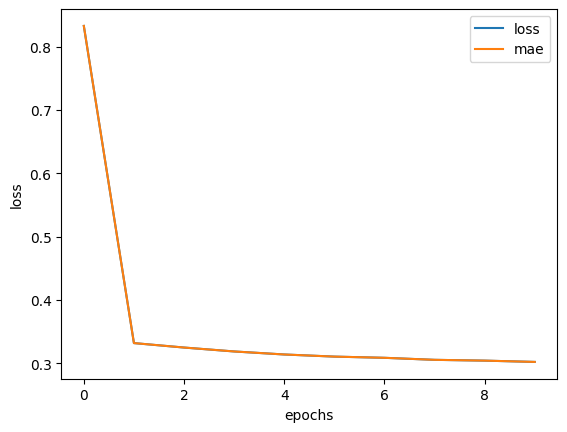

In [133]:
pd.DataFrame(history_2.history).plot()
plt.ylabel('loss')
plt.xlabel('epochs')
plt.show()

In [135]:
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1),
])

model_3.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=['mae'])

history_3 = model_3.fit(X_train_normal, y_train, epochs=100)

Epoch 1/100
3687/3687 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 2.8701 - mae: 2.8701
Epoch 2/100
3687/3687 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - loss: 0.3295 - mae: 0.3295
Epoch 3/100
3687/3687 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 0.3234 - mae: 0.3234
Epoch 4/100
3687/3687 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step - loss: 0.3176 - mae: 0.3176
Epoch 5/100
3687/3687 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - loss: 0.3130 - mae: 0.3130
Epoch 6/100
3687/3687 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.3098 - mae: 0.3098
Epoch 7/100
3687/3687 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step - loss: 0.3085 - mae: 0.3085
Epoch 8/100
3687/3687 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 0.3069 - mae: 0.3069
Epoch 9/100
3687/3687 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step - loss: 0.3038 - mae: 0.3038
Epoch 10/100
3687/3687 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 0.3034 - mae: 0.3034
Epoch 11/100
3687/3687 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step - loss: 0.3018 - mae: 0.3018
Epoch 12/100
3687/3687 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step - loss: 0.3008 

In [136]:
model_3.evaluate(X_test_normal, y_test)

922/922 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.2713 - mae: 0.2713


[0.2719341516494751, 0.2719341516494751]

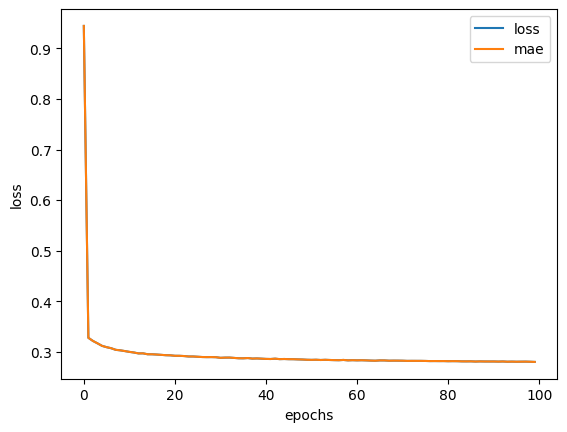

In [137]:
pd.DataFrame(history_3.history).plot()
plt.ylabel('loss')
plt.xlabel('epochs')
plt.show()

In [139]:
y_pred = model_3.predict(X_test_normal)
y_pred

922/922 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


array([[27.487944],
       [29.56895 ],
       [32.57269 ],
       ...,
       [33.304623],
       [28.48816 ],
       [27.850304]], dtype=float32)

In [140]:
y_pred.shape

(29496, 1)

In [163]:
def plot_predictions(train_data, train_label, test_data, test_label, predictions):
    """
    Plots training data, test data, and predictions.
    Converts TensorFlow tensors to NumPy arrays if needed.
    """
    import numpy as np
    import matplotlib.pyplot as plt

    # Convert to NumPy arrays if inputs are TensorFlow tensors
    if hasattr(train_label, "numpy"):
        train_label = train_label.numpy()
    if hasattr(test_label, "numpy"):
        test_label = test_label.numpy()
    if hasattr(predictions, "numpy"):
        predictions = predictions.numpy()

    # Plot the data
    plt.figure(figsize=(10, 7))
    plt.scatter(train_data[:, 0], train_label, c='b', label='Training data')  # First feature
    plt.scatter(test_data[:, 0], test_label, c='g', label='Testing data')  # First feature
    plt.scatter(test_data[:, 0], predictions, c='r', label='Predictions')  # Predictions
    plt.legend()
    plt.xlabel("Feature 1")
    plt.ylabel("Target")
    plt.title("Training, Testing, and Predicted Data")
    plt.show()


In [162]:
X_train_normal.shape, X_test_normal.shape,y_train, y_test.shape, y_pred.shape

((117984, 43),
 (29496, 43),
 9789      30.8
 7329      29.2
 141361    32.5
 118585    28.2
 23944     29.1
           ... 
 119879    32.9
 103694    29.1
 131932    30.7
 146867    29.6
 121958    29.6
 Name: temperature_2m_max, Length: 117984, dtype: float64,
 (29496,),
 (29496, 1))

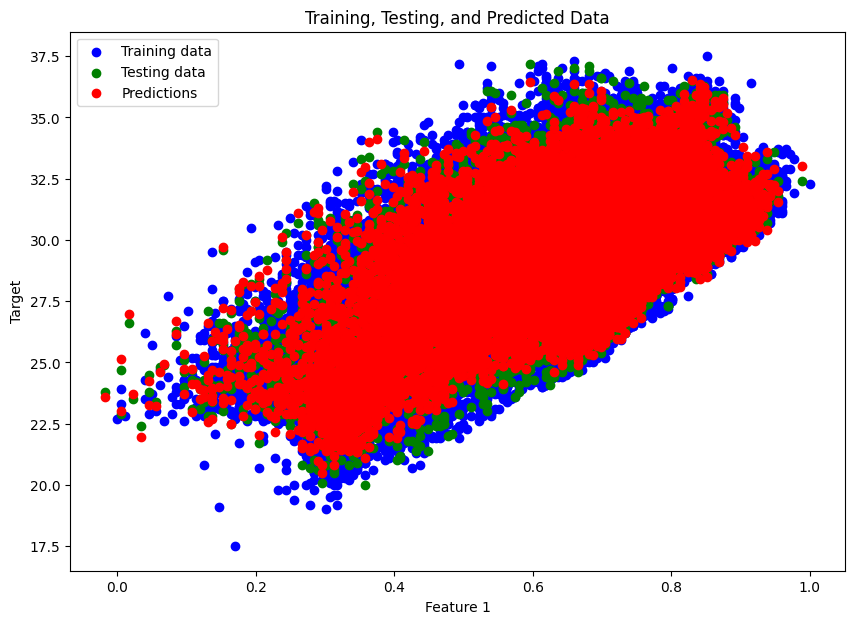

In [164]:
plot_predictions(train_data=tf.squeeze(X_train_normal),train_label=tf.squeeze(y_train),test_data=X_test_normal,test_label=y_test,predictions=y_pred)

In [154]:
MAE_1 = tf.keras.losses.MAE(y_test,tf.squeeze(y_pred))
print(f"The MAE for the first model is: {MAE_1}")

The MAE for the first model is: 0.2719341814517975
